Importing The Dependenices

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing The Boston House Price Dataset

In [14]:
#loading the dataset into pandas dataframe
house_price_prediction = pd.read_csv('Boston.csv')

In [16]:
#print first 5 rows of the dataset
house_price_prediction.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [17]:
#checking the number of rows and columns in the datafram
house_price_prediction.shape

(506, 13)

In [18]:
#check for missing values
house_price_prediction.isnull().sum()

,0
crim,0
zn,0
indus,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0
ptratio,0


In [19]:
#statistical measures of the data
house_price_prediction.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding The Correlation Between Various Features In The Dataset

2 Types Of Correlation


1.   Possitive Correlation (if one value increses another value increases)
2.   Negative Correlation (if one value increses another value decreases)



In [25]:
correlation = house_price_prediction.corr()

<Axes: >

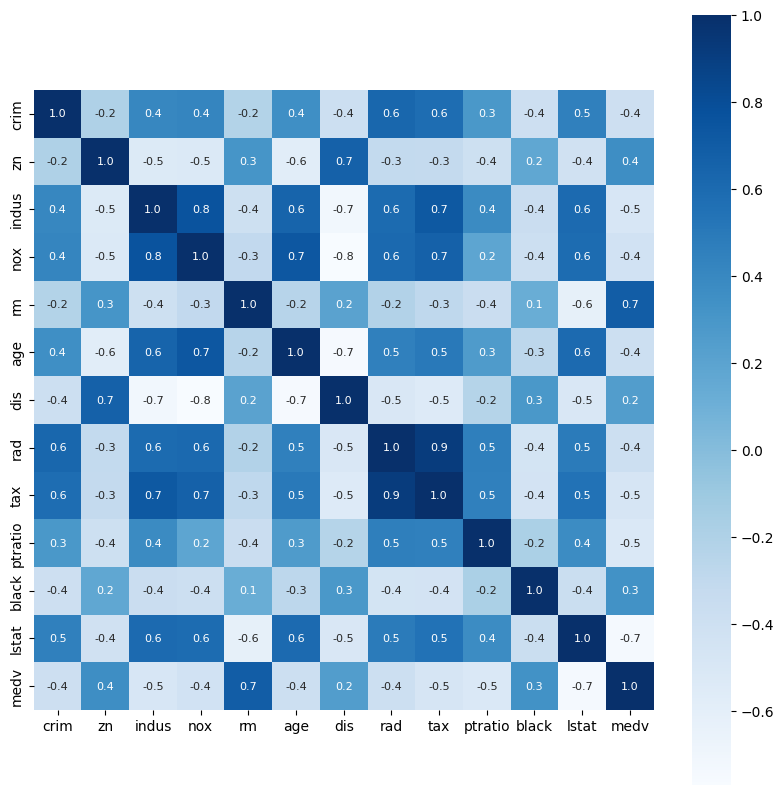

In [26]:
#constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting The Data & Target

In [27]:
X = house_price_prediction.drop(['medv'], axis=1)
Y = house_price_prediction['medv']

In [28]:
print(X)
print(Y)

        crim    zn  indus    nox     rm  ...  rad  tax  ptratio   black  lstat
0    0.00632  18.0   2.31  0.538  6.575  ...    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07  0.469  6.421  ...    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07  0.469  7.185  ...    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18  0.458  6.998  ...    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18  0.458  7.147  ...    3  222     18.7  396.90   5.33
..       ...   ...    ...    ...    ...  ...  ...  ...      ...     ...    ...
501  0.06263   0.0  11.93  0.573  6.593  ...    1  273     21.0  391.99   9.67
502  0.04527   0.0  11.93  0.573  6.120  ...    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93  0.573  6.976  ...    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93  0.573  6.794  ...    1  273     21.0  393.45   6.48
505  0.04741   0.0  11.93  0.573  6.030  ...    1  273     21.0  396.90   7.88

[506 rows x 12 columns]
0      24.0
1      21.6
2  

Splitting The Data Into Training Data & Test Data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(506, 12) (404, 12) (102, 12)


Model Training

XGBoost Regressor --> Type of Decision Tree Model

In [31]:
#loading the model
model = XGBRegressor()

In [32]:
#training the model with x_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

Prediction On Training Data

In [34]:
#accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [35]:
print(training_data_prediction)

[23.113409  20.99455   20.103458  34.687927  13.906415  13.508417
 22.002142  15.198493  10.889583  22.676844  13.8030205  5.603884
 29.804611  49.99187   34.898033  20.591589  23.393686  19.195648
 32.69865   19.601896  26.991405   8.395937  45.998535  21.720137
 27.085878  19.377338  19.291138  24.795988  22.606901  31.697853
 18.531605   8.703258  17.401026  23.703207  13.29562   10.501
 12.695764  24.99733   19.69437   14.892947  24.207811  24.983067
 14.895055  16.990664  15.599213  12.6966715 24.505178  15.013172
 50.002045  17.518734  21.200682  32.010895  15.60216   22.90243
 19.30938   18.69068   23.296959  37.201183  30.099453  33.114204
 20.983852  49.997845  13.403107   5.003162  16.498903   8.405742
 28.673124  19.495108  20.588688  45.400467  39.81373   33.403538
 19.824095  33.3916    25.28929   49.999763  12.513209  17.426533
 18.604822  22.589792  50.00601   23.82899   23.312943  23.10278
 41.716457  16.112873  31.619146  36.099514   7.005155  20.397533
 19.998219  11.

In [36]:
#r squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

#mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R Squared Error: ' , score_1)
print('Mean Absolute Error (MAE): ' , score_2)

R Squared Error:  0.999998395818042
Mean Absolute Error:  0.00835014428242597


Visualizing The Actual Prices and Predicted Prices

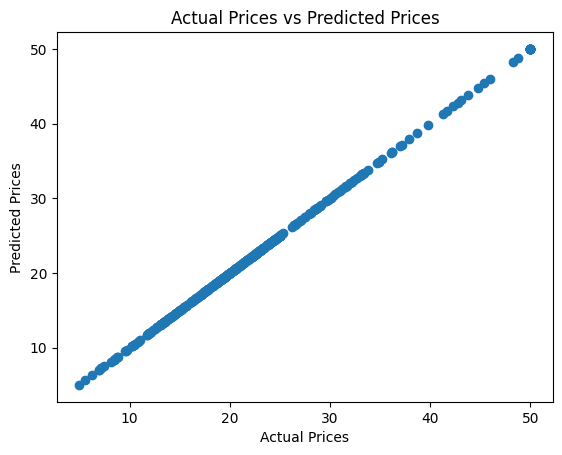

In [41]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

Prediciton On Test Data

In [43]:
#accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [44]:
#r squared error
score_3 = metrics.r2_score(Y_test, test_data_prediction)

#mean absolute error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Squared Error: ' , score_3)
print('Mean Absolute Error (MAE): ' , score_4)

R Squared Error:  0.9047370247342094
Mean Absolute Error (MAE):  2.1214681644065707


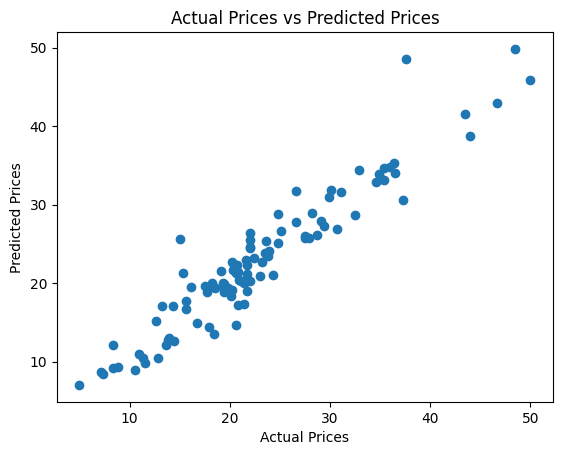

In [42]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()